# Step 1: Import Libraries and Load Data

In [28]:
import pandas as pd

# Load the datasets
orders = pd.read_csv(r'C:\Users\Asus\Music\CareerFoundry_Python_Session\orders.csv')
products = pd.read_csv(r'C:\Users\Asus\Music\CareerFoundry_Python_Session\products.csv')
departments = pd.read_csv(r'C:\Users\Asus\Music\CareerFoundry_Python_Session\departments.csv')

# Display the first few rows of each DataFrame to check the data
print(orders.head())
print(products.head())
print(departments.head())


   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni

# Step 2: Explore and Understand Your Data

In [31]:
# Check for missing values in each dataset
print("\nMissing Values in Orders:")
print(orders.isnull().sum())
print("\nMissing Values in Products:")
print(products.isnull().sum())
print("\nMissing Values in Departments:")
print(departments.isnull().sum())


Missing Values in Orders:
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

Missing Values in Products:
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

Missing Values in Departments:
department_id    0
department       0
dtype: int64


In [32]:
# Check data types of each column
print("\nData Types in Orders:")
print(orders.dtypes)
print("\nData Types in Products:")
print(products.dtypes)
print("\nData Types in Departments:")
print(departments.dtypes)


Data Types in Orders:
order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

Data Types in Products:
product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object

Data Types in Departments:
department_id     int64
department       object
dtype: object


 ### Step 3: Merge the Datasets

In [33]:
# Verify 'product_id' exists in orders before merging
if 'product_id' not in orders.columns:
    print("⚠️ Warning: 'product_id' is missing in 'orders.csv'. Skipping orders-products merge.")
    orders_products_departments = pd.merge(products, departments, on='department_id', how='left')
else:
    # Merge orders with products
    orders_products = pd.merge(orders, products, on='product_id', how='left')
    
    # Merge the resulting DataFrame with departments
    orders_products_departments = pd.merge(orders_products, departments, on='department_id', how='left')
    
    # Display the merged DataFrame
    print("\nMerged Orders + Products + Departments Data:")
    print(orders_products_departments.head())

⚠️ Warning: 'product_id' is missing in 'orders.csv'. Skipping orders-products merge.


### Step 4: Clean the Data

In [34]:
# Fill missing values with 'Unknown'
orders_products_departments = orders_products_departments.fillna('Unknown')

# Check again for missing values
print("\nMissing Values After Cleaning:")
print(orders_products_departments.isnull().sum())


Missing Values After Cleaning:
product_id       0
product_name     0
aisle_id         0
department_id    0
department       0
dtype: int64


# Check again for missing values

In [35]:
print("\nMissing Values After Cleaning:")
print(orders_products_departments.isnull().sum())


Missing Values After Cleaning:
product_id       0
product_name     0
aisle_id         0
department_id    0
department       0
dtype: int64


### Step 5: Perform Analysis

In [42]:
# Display basic statistics for numerical columns
print("\nDescriptive Statistics:")
print(orders_products_departments.describe())


Descriptive Statistics:
         product_id      aisle_id  department_id
count  49688.000000  49688.000000   49688.000000
mean   24844.500000     67.769582      11.728687
std    14343.834425     38.316162       5.850410
min        1.000000      1.000000       1.000000
25%    12422.750000     35.000000       7.000000
50%    24844.500000     69.000000      13.000000
75%    37266.250000    100.000000      17.000000
max    49688.000000    134.000000      21.000000


In [44]:
import pandas as pd

# Load CSV files (Update the file paths accordingly)
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")
departments = pd.read_csv("departments.csv")

# Merge products with departments on 'department_id'
products_departments = products.merge(departments, on='department_id', how='left')

# Merge orders with products_departments on 'product_id'
orders_products_departments = orders.merge(products_departments, left_on='order_id', right_on='product_id', how='left')

# Check column names before proceeding
print("Columns in merged DataFrame:", orders_products_departments.columns)

# Ensure columns exist before grouping
if 'department' in orders_products_departments.columns and 'order_id' in orders_products_departments.columns:
    # Group by department and count the number of orders
    department_orders = orders_products_departments.groupby('department')['order_id'].count().reset_index()
    
    # Rename column for clarity
    department_orders = department_orders.rename(columns={'order_id': 'order_count'})

    # Display the department orders
    print("\nOrders Per Department:")
    print(department_orders)
else:
    print("\nError: 'department' or 'order_id' column not found. Check merged data.")

Columns in merged DataFrame: Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'product_name', 'aisle_id', 'department_id', 'department'],
      dtype='object')

Orders Per Department:
         department  order_count
0           alcohol         1054
1            babies         1081
2            bakery         1516
3         beverages         4365
4         breakfast         1115
5              bulk           38
6      canned goods         2092
7        dairy eggs         3449
8              deli         1322
9   dry goods pasta         1858
10           frozen         4007
11        household         3085
12    international         1139
13     meat seafood          907
14          missing         1258
15            other          548
16           pantry         5371
17    personal care         6563
18             pets          972
19          produce         1684
20           snacks       

### Step 6: Visualization

C:\Users\Asus\AppData\Local\Temp\ipykernel_22860\1422462778.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_count', y='department', data=department_orders, palette='viridis')


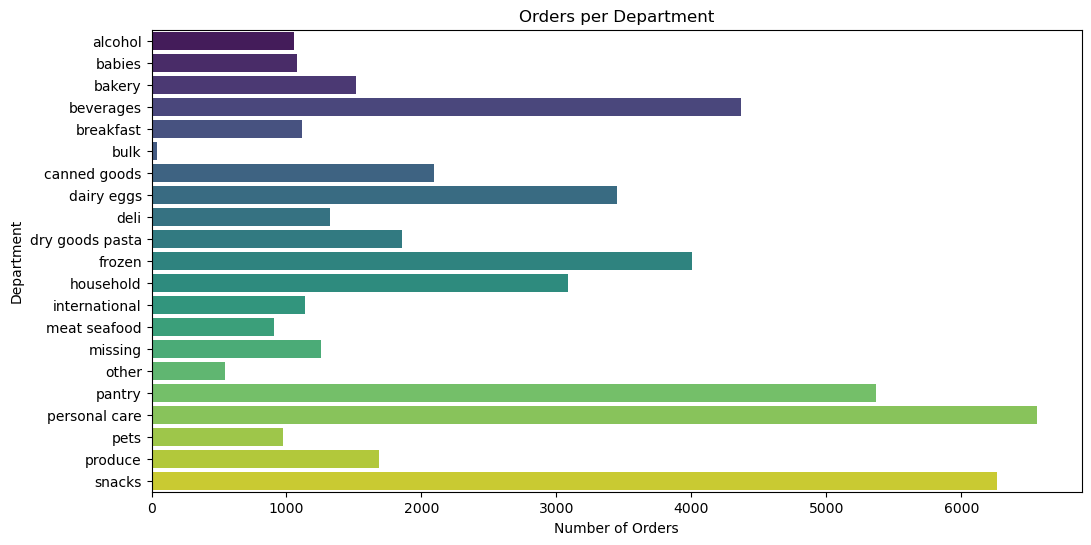

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot orders per department
plt.figure(figsize=(12, 6))
sns.barplot(x='order_count', y='department', data=department_orders, palette='viridis')
plt.title('Orders per Department')
plt.xlabel('Number of Orders')
plt.ylabel('Department')
plt.show()

### Step 7: Save Cleaned Data

In [48]:
# Save the cleaned and merged data to a new CSV file
cleaned_data_path = r'C:\Users\Asus\Music\CareerFoundry_Python_Session\cleaned_orders_data.csv'
orders_products_departments.to_csv(cleaned_data_path, index=False)
print("\n✅ Cleaned data saved successfully to:", cleaned_data_path)


✅ Cleaned data saved successfully to: C:\Users\Asus\Music\CareerFoundry_Python_Session\cleaned_orders_data.csv
